In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from mid_simulations.simulation_funcs import (
    get_events_df_for_subject,
)

# Do probe durations vary by hit/miss?

I'm trying to understand why there is a mild bias in the feedback hit vs. miss contrast when signal is only introduced during the fixation.  If it is the case that the probe durations vary, this could explain why.  The further the Feedback onset is from the introduced fixation activation, the weaker the bias would be.

In [2]:
sub = 1
events = get_events_df_for_subject(sub, dataset='ABCD')

In [4]:
def get_feedback_probe_diff(sub):
    events = get_events_df_for_subject(sub, dataset='ABCD')
    events['FEEDBACK_PROBE_DIFF'] = (
        events['FEEDBACK_ONSET'] - events['PROBE_ONSET']
    )
    average_diff = events.groupby(['TRIAL_TYPE', 'PROBE_HIT'])[
        'FEEDBACK_PROBE_DIFF'
    ].mean()
    average_diff = average_diff.reset_index(name='FEEDBACK_PROBE_DIFF')
    return average_diff

In [5]:
# get_subdata_long(sub, dataset="AHRB", verbose=False)

all_dfs = []
for sub in range(1, 501):
    df = get_feedback_probe_diff(sub)
    all_dfs.append(df)
concatenated_df = pd.concat(all_dfs, ignore_index=True)

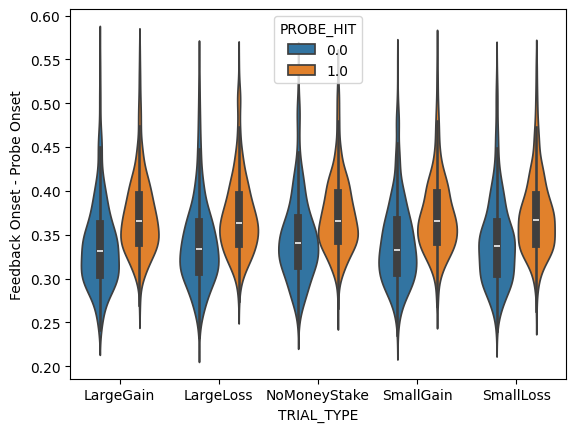

In [6]:
sns.violinplot(
    x='TRIAL_TYPE',
    y='FEEDBACK_PROBE_DIFF',
    hue='PROBE_HIT',
    data=concatenated_df,
)
plt.ylabel('Feedback Onset - Probe Onset')
plt.show()

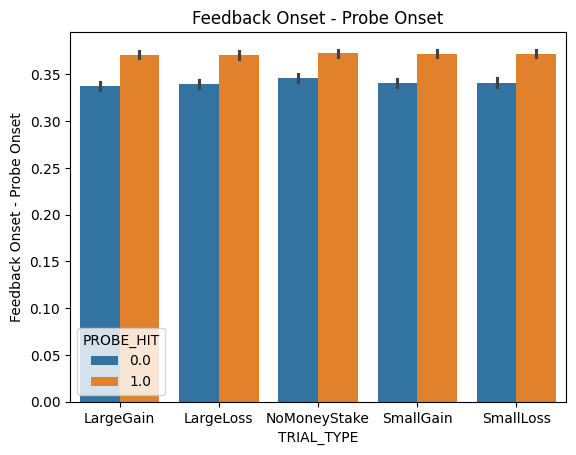

In [7]:
sns.barplot(
    x='TRIAL_TYPE',
    y='FEEDBACK_PROBE_DIFF',
    hue='PROBE_HIT',
    data=concatenated_df,
)
plt.title('Feedback Onset - Probe Onset')
plt.ylabel('Feedback Onset - Probe Onset')
plt.show()

In [8]:
def get_fixation_probe_diff(sub):
    events = get_events_df_for_subject(sub, dataset='ABCD')
    events['FIXATION_PROBE_DIFF'] = (
        events['PROBE_ONSET'] - events['FIXATION_ONSET']
    )
    average_diff = events.groupby(['TRIAL_TYPE', 'PROBE_HIT'])[
        'FIXATION_PROBE_DIFF'
    ].mean()
    average_diff = average_diff.reset_index(name='FIXATION_PROBE_DIFF')
    return average_diff

In [9]:
all_dfs_fixation = []
for sub in range(1, 501):
    df = get_fixation_probe_diff(sub)
    all_dfs_fixation.append(df)
concatenated_df_fixation = pd.concat(all_dfs_fixation, ignore_index=True)

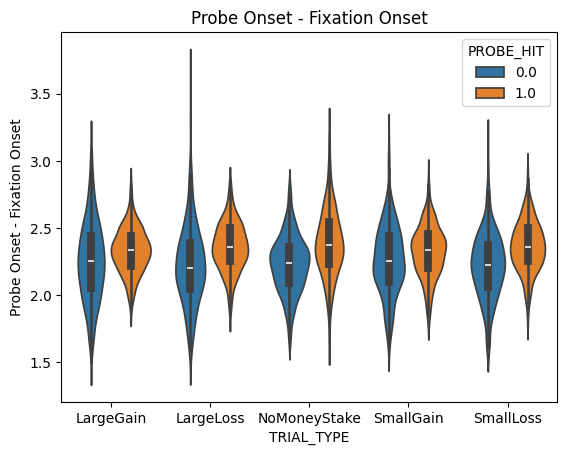

In [10]:
sns.violinplot(
    x='TRIAL_TYPE',
    y='FIXATION_PROBE_DIFF',
    hue='PROBE_HIT',
    data=concatenated_df_fixation,
)
plt.ylabel('Probe Onset - Fixation Onset')
plt.title('Probe Onset - Fixation Onset')
plt.show()

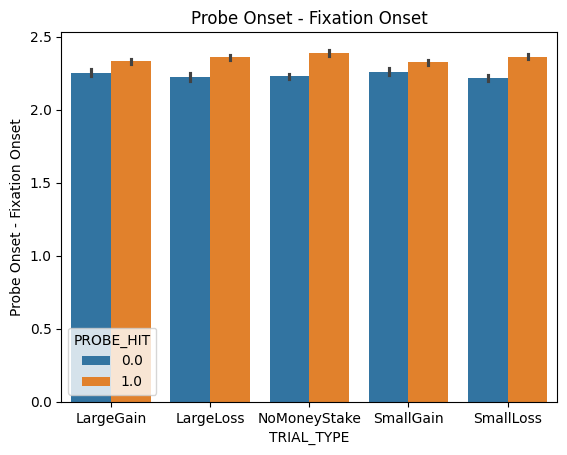

In [11]:
sns.barplot(
    x='TRIAL_TYPE',
    y='FIXATION_PROBE_DIFF',
    hue='PROBE_HIT',
    data=concatenated_df_fixation,
)
plt.title('Probe Onset - Fixation Onset')
plt.ylabel('Probe Onset - Fixation Onset')
plt.show()

In [12]:
def get_fixation_feedback_diff(sub):
    events = get_events_df_for_subject(sub, dataset='ABCD')
    events['FIXATION_FEEDBACK_DIFF'] = (
        events['FEEDBACK_ONSET'] - events['FIXATION_ONSET']
    )
    average_diff = events.groupby(['TRIAL_TYPE', 'PROBE_HIT'])[
        'FIXATION_FEEDBACK_DIFF'
    ].mean()
    average_diff = average_diff.reset_index(name='FIXATION_FEEDBACK_DIFF')
    return average_diff

In [13]:
all_dfs_fixation_fb = []
for sub in range(1, 501):
    df = get_fixation_feedback_diff(sub)
    all_dfs_fixation_fb.append(df)
concatenated_df_fixation_fb = pd.concat(all_dfs_fixation_fb, ignore_index=True)

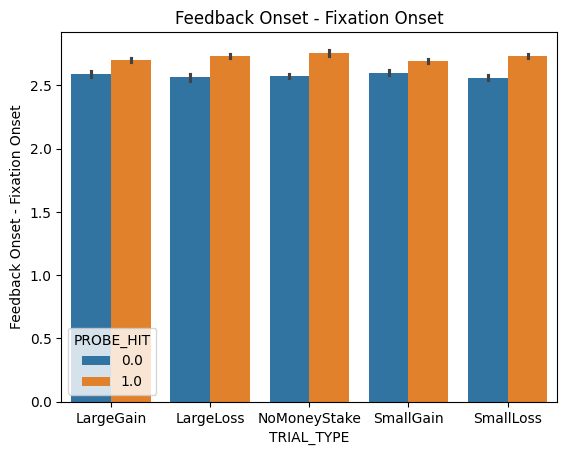

In [14]:
sns.barplot(
    x='TRIAL_TYPE',
    y='FIXATION_FEEDBACK_DIFF',
    hue='PROBE_HIT',
    data=concatenated_df_fixation_fb,
)
plt.title('Feedback Onset - Fixation Onset')
plt.ylabel('Feedback Onset - Fixation Onset')
plt.show()

In [72]:
sub = 1
events = get_events_df_for_subject(sub, dataset='ABCD')
print(events)

    index  trial_number    TRIAL_TYPE  CUE_ONSET  CUE_DURATION  \
0       0             0     SmallGain      2.034         1.966   
1       1             1     SmallLoss     10.033         1.967   
2       2             2  NoMoneyStake     17.533         1.966   
3       3             3     SmallGain     24.032         1.967   
4       4             4     SmallLoss     30.032         1.966   
..    ...           ...           ...        ...           ...   
95     45            95     LargeLoss    603.515         1.966   
96     46            96     LargeGain    609.014         1.967   
97     47            97     SmallGain    614.514         1.966   
98     48            98     SmallLoss    620.013         1.967   
99     49            99     LargeLoss    626.013         1.967   

    FIXATION_ONSET  FIXATION_DURATION  PROBE_ONSET  PROBE_DURATION  \
0            4.000              4.000        8.000           0.233   
1           12.000              3.499       15.499           0.234 

In [15]:
def get_all_durations(sub):
    events = get_events_df_for_subject(sub, dataset='ABCD')
    events['TD1_ONSET'] = events['PROBE_ONSET'] + events['PROBE_DURATION']
    events['TD1_DURATION'] = events['FEEDBACK_ONSET'] - events['TD1_ONSET']
    events = events.rename(
        columns={
            'FIXATION_DURATION': 'Fixation_DURATION',
            'PROBE_DURATION': 'Probe_DURATION',
            'CUE_DURATION': 'Cue_DURATION',
            'FEEDBACK_DURATION': 'Feedback_DURATION',
        }
    )
    average_dur = events.groupby(['TRIAL_TYPE', 'PROBE_HIT'])[
        ['Cue_DURATION', 'Fixation_DURATION', 'Probe_DURATION', 'TD1_DURATION', 'Feedback_DURATION']
    ].mean()
    average_dur = average_dur.reset_index()
    return average_dur

In [16]:

all_dfs_duration = []
for sub in range(1, 501):
    df = get_all_durations(sub)
    all_dfs_duration.append(df)
concatenated_df_duration = pd.concat(all_dfs_duration, ignore_index=True)

In [17]:
print(concatenated_df_duration.shape)
concatenated_df_duration_long = pd.melt(
    concatenated_df_duration,
    id_vars=['TRIAL_TYPE', 'PROBE_HIT'],
    value_vars=[
        col for col in concatenated_df_duration.columns if 'DURATION' in col
    ],
    var_name='Stimulus',
    value_name='DURATION',
)
concatenated_df_duration_long['Stimulus'] = concatenated_df_duration_long[
    'Stimulus'
].str.replace('_DURATION', '')
concatenated_df_duration_long[
    'stimulus_outcome'
] = concatenated_df_duration_long.apply(
    lambda row: f"{row['Stimulus']}/Hit"
    if row['PROBE_HIT'] == 1
    else f"{row['Stimulus']}/Miss",
    axis=1,
)
print(concatenated_df_duration_long)

(5000, 7)
         TRIAL_TYPE  PROBE_HIT  Stimulus  DURATION stimulus_outcome
0         LargeGain        0.0       Cue  1.966625         Cue/Miss
1         LargeGain        1.0       Cue  1.966417          Cue/Hit
2         LargeLoss        0.0       Cue  1.966400         Cue/Miss
3         LargeLoss        1.0       Cue  1.966600          Cue/Hit
4      NoMoneyStake        0.0       Cue  1.966769         Cue/Miss
...             ...        ...       ...       ...              ...
24995  NoMoneyStake        1.0  Feedback  1.683364     Feedback/Hit
24996     SmallGain        0.0  Feedback  1.733455    Feedback/Miss
24997     SmallGain        1.0  Feedback  1.672222     Feedback/Hit
24998     SmallLoss        0.0  Feedback  1.733333    Feedback/Miss
24999     SmallLoss        1.0  Feedback  1.691571     Feedback/Hit

[25000 rows x 5 columns]


In [18]:
mean_duration_per_outcome = concatenated_df_duration_long.groupby('Stimulus')['DURATION'].mean().reset_index()
#print(mean_duration_per_outcome)

min_duration_per_outcome = concatenated_df_duration_long.groupby('Stimulus')['DURATION'].min().reset_index()
max_duration_per_outcome = concatenated_df_duration_long.groupby('Stimulus')['DURATION'].max().reset_index()
print(min_duration_per_outcome*1000)
print('')
print(max_duration_per_outcome*1000)


                                            Stimulus     DURATION
0  CueCueCueCueCueCueCueCueCueCueCueCueCueCueCueC...  1781.222222
1  FeedbackFeedbackFeedbackFeedbackFeedbackFeedba...  1473.714286
2  FixationFixationFixationFixationFixationFixati...  1500.000000
3  ProbeProbeProbeProbeProbeProbeProbeProbeProbeP...   172.166667
4  TD1TD1TD1TD1TD1TD1TD1TD1TD1TD1TD1TD1TD1TD1TD1T...    53.666667

                                            Stimulus     DURATION
0  CueCueCueCueCueCueCueCueCueCueCueCueCueCueCueC...  2039.666667
1  FeedbackFeedbackFeedbackFeedbackFeedbackFeedba...  1789.166667
2  FixationFixationFixationFixationFixationFixati...  3666.333333
3  ProbeProbeProbeProbeProbeProbeProbeProbeProbeP...   497.444444
4  TD1TD1TD1TD1TD1TD1TD1TD1TD1TD1TD1TD1TD1TD1TD1T...   109.000000


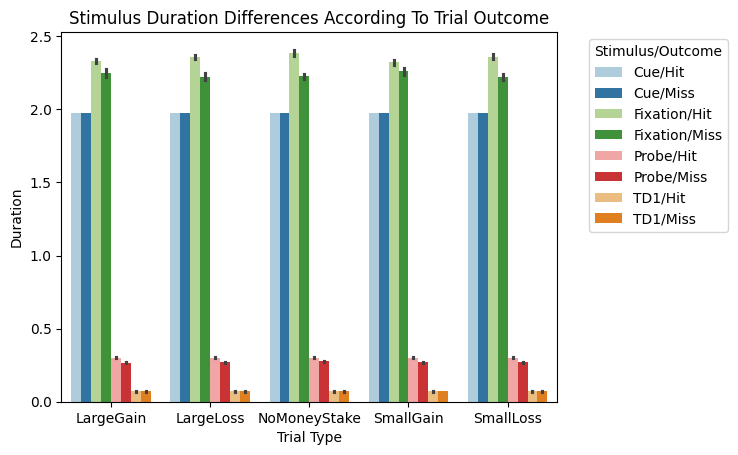

In [19]:
sns.barplot(
    x='TRIAL_TYPE',
    y='DURATION',
    hue='stimulus_outcome',
    data=concatenated_df_duration_long,
    palette='Paired',
    hue_order=[
        'Cue/Hit',
        'Cue/Miss',
        'Fixation/Hit',
        'Fixation/Miss',
        'Probe/Hit',
        'Probe/Miss',
        'TD1/Hit',
        'TD1/Miss',
    ],
)
plt.legend(
    title='Stimulus/Outcome', bbox_to_anchor=(1.05, 1), loc='upper left'
)
plt.ylabel('Duration')
plt.xlabel('Trial Type')
plt.title('Stimulus Duration Differences According To Trial Outcome')
plt.show()

In [37]:
concatenated_df_duration_long
duration_long_no_td1 = concatenated_df_duration_long[concatenated_df_duration_long['Stimulus'] != 'TD1']
print(concatenated_df_duration_long.shape)
print(duration_long_no_td1.shape)

(25000, 5)
(20000, 5)


## Calculate average difference in fixations between Hits and Miss

In [62]:
mean_duration_per_trial_type = duration_long_no_td1.groupby(['TRIAL_TYPE', 'stimulus_outcome'])['DURATION'].mean().reset_index()

mean_duration_per_trial_type['Stimulus'] = mean_duration_per_trial_type['stimulus_outcome'].str.split('/').str[0]


# Subtract odd rows from even rows
diffs = mean_duration_per_trial_type.iloc[::2].reset_index(drop=True)
diffs['DURATION_DIFF'] = diffs['DURATION'].values - mean_duration_per_trial_type.iloc[1::2]['DURATION'].values 

print(diffs[~diffs['Stimulus'].str.contains('Cue|Feedback|Probe')])
print('')
print(diffs[~diffs['Stimulus'].str.contains('Cue|Feedback|Fixation')])




      TRIAL_TYPE stimulus_outcome  DURATION  Stimulus  DURATION_DIFF
2      LargeGain     Fixation/Hit  2.330631  Fixation       0.079832
6      LargeLoss     Fixation/Hit  2.359066  Fixation       0.135438
10  NoMoneyStake     Fixation/Hit  2.386313  Fixation       0.157921
14     SmallGain     Fixation/Hit  2.323420  Fixation       0.062957
18     SmallLoss     Fixation/Hit  2.361166  Fixation       0.141807

      TRIAL_TYPE stimulus_outcome  DURATION Stimulus  DURATION_DIFF
3      LargeGain        Probe/Hit  0.300891    Probe       0.033828
7      LargeLoss        Probe/Hit  0.300463    Probe       0.031370
11  NoMoneyStake        Probe/Hit  0.301804    Probe       0.026277
15     SmallGain        Probe/Hit  0.301675    Probe       0.032627
19     SmallLoss        Probe/Hit  0.301523    Probe       0.031042


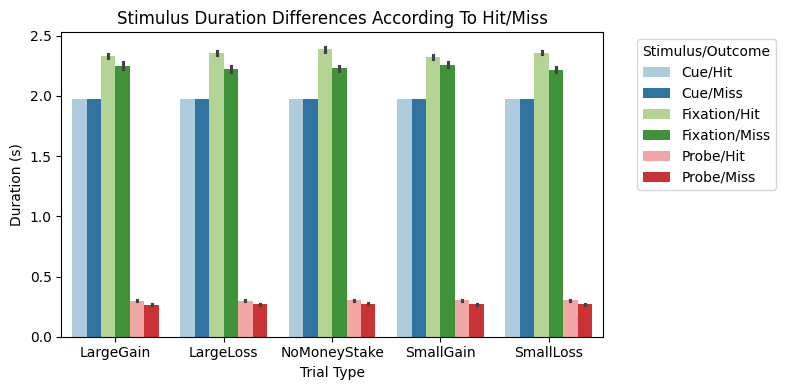

In [43]:
fig_path = '../MID_paper_figures/durations_hit_miss.pdf'

plt.figure(figsize=(8, 4))
sns.barplot(
    x='TRIAL_TYPE',
    y='DURATION',
    hue='stimulus_outcome',
    data=duration_long_no_td1,
    palette='Paired',
    hue_order=[
        'Cue/Hit',
        'Cue/Miss',
        'Fixation/Hit',
        'Fixation/Miss',
        'Probe/Hit',
        'Probe/Miss'
    ],
)
plt.legend(
    title='Stimulus/Outcome', bbox_to_anchor=(1.05, 1), loc='upper left'
)
plt.ylabel('Duration (s)')
plt.xlabel('Trial Type')
plt.title('Stimulus Duration Differences According To Hit/Miss')
plt.tight_layout()
plt.savefig(fig_path)
plt.show()

In [20]:
def get_all_rts(sub):
    events = get_events_df_for_subject(sub, dataset='ABCD')
    events = events.rename(columns={'RT_corrected': 'Response Time'})
    average_rt = events.groupby(['TRIAL_TYPE', 'PROBE_HIT'])[
        ['Response Time']
    ].mean()
    average_rt = average_rt.reset_index()
    return average_rt

In [21]:

all_dfs_rts = []
for sub in range(1, 501):
    df = get_all_rts(sub)
    all_dfs_rts.append(df)
concatenated_df_rts = pd.concat(all_dfs_rts, ignore_index=True)

In [22]:
concatenated_df_rts['stimulus_outcome'] = concatenated_df_duration_long.apply(
    lambda row: f'Hit' if row['PROBE_HIT'] == 1 else f'Miss', axis=1
)
print(concatenated_df_rts)

        TRIAL_TYPE  PROBE_HIT  Response Time stimulus_outcome
0        LargeGain        0.0     241.500000             Miss
1        LargeGain        1.0     213.333333              Hit
2        LargeLoss        0.0     230.500000             Miss
3        LargeLoss        1.0     216.600000              Hit
4     NoMoneyStake        0.0     261.400000             Miss
...            ...        ...            ...              ...
4995  NoMoneyStake        1.0     219.454545              Hit
4996     SmallGain        0.0     281.000000             Miss
4997     SmallGain        1.0     226.666667              Hit
4998     SmallLoss        0.0     227.500000             Miss
4999     SmallLoss        1.0     211.857143              Hit

[5000 rows x 4 columns]


In [23]:
concatenated_df_rts['Response Time'].min(), concatenated_df_rts['Response Time'].max()

(np.float64(105.5), np.float64(1581.0))

In [114]:
mean_rt_per_trial_type = concatenated_df_rts.groupby(['TRIAL_TYPE', 'stimulus_outcome'])['Response Time'].mean().reset_index()

# Subtract odd rows from even rows
diffs = mean_rt_per_trial_type.iloc[::2].reset_index(drop=True)
diffs['RT_DIFF (hit-miss)'] = diffs['Response Time'].values - mean_rt_per_trial_type.iloc[1::2]['Response Time'].values 
print(diffs)
#print(diffs[~diffs['Stimulus'].str.contains('Cue|Feedback|Probe')])
#print('')
#print(diffs[~diffs['Stimulus'].str.contains('Cue|Feedback|Fixation')])

     TRIAL_TYPE stimulus_outcome  Response Time  RT_DIFF (hit-miss)
0     LargeGain              Hit     241.210454          -78.556657
1     LargeLoss              Hit     241.810548          -85.576991
2  NoMoneyStake              Hit     246.721201          -99.894827
3     SmallGain              Hit     244.046642          -83.518742
4     SmallLoss              Hit     243.312573          -95.835527


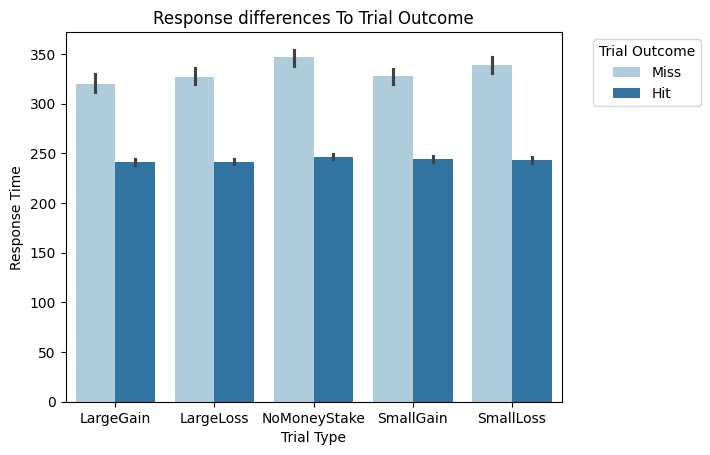

In [24]:
sns.barplot(
    x='TRIAL_TYPE',
    y='Response Time',
    hue='stimulus_outcome',
    data=concatenated_df_rts,
    palette='Paired',
)
plt.legend(title='Trial Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Response Time')
plt.xlabel('Trial Type')
plt.title('Response differences To Trial Outcome')
plt.show()

In [25]:
print(concatenated_df_duration_long)

         TRIAL_TYPE  PROBE_HIT  Stimulus  DURATION stimulus_outcome
0         LargeGain        0.0       Cue  1.966625         Cue/Miss
1         LargeGain        1.0       Cue  1.966417          Cue/Hit
2         LargeLoss        0.0       Cue  1.966400         Cue/Miss
3         LargeLoss        1.0       Cue  1.966600          Cue/Hit
4      NoMoneyStake        0.0       Cue  1.966769         Cue/Miss
...             ...        ...       ...       ...              ...
24995  NoMoneyStake        1.0  Feedback  1.683364     Feedback/Hit
24996     SmallGain        0.0  Feedback  1.733455    Feedback/Miss
24997     SmallGain        1.0  Feedback  1.672222     Feedback/Hit
24998     SmallLoss        0.0  Feedback  1.733333    Feedback/Miss
24999     SmallLoss        1.0  Feedback  1.691571     Feedback/Hit

[25000 rows x 5 columns]


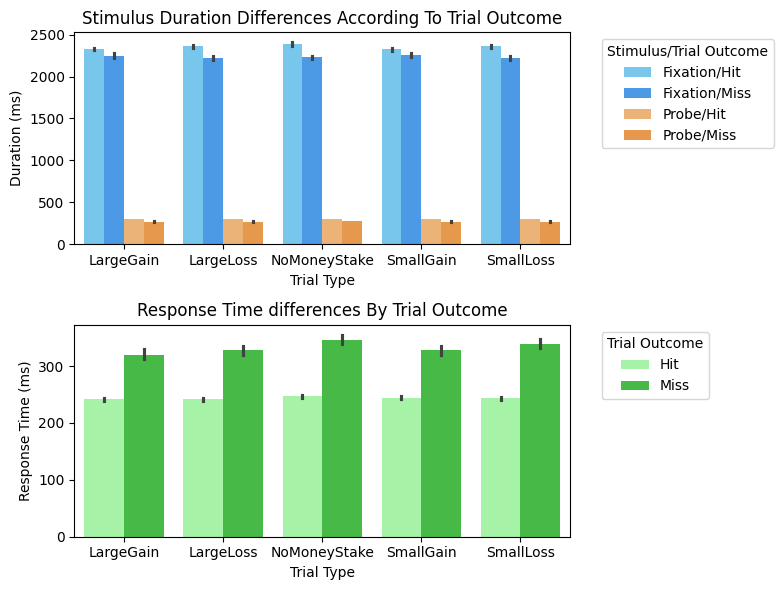

In [153]:
# Put the above two plots together
two_pairs = ["#66CCFF", "#3399FF",  "#FFB366", "#FF9933"]
one_pair = ["#99FF99", "#33CC33"]


concatenated_df_duration_long_no_td1 = concatenated_df_duration_long.loc[concatenated_df_duration_long['Stimulus'] != 'TD1', :].copy()
concatenated_df_duration_long_no_td1['duration_ms'] = concatenated_df_duration_long_no_td1['DURATION'] * 1000 

fig, axs = plt.subplots(2, 1, figsize=(8,6))

sns.barplot(
    x='TRIAL_TYPE',
    y='duration_ms',
    hue='stimulus_outcome',
    data=concatenated_df_duration_long_no_td1,
    palette=two_pairs,
    hue_order=[
        'Fixation/Hit',
        'Fixation/Miss',
        'Probe/Hit',
        'Probe/Miss'
    ],
    ax=axs[0],
)

axs[0].legend(
    title='Stimulus/Trial Outcome', bbox_to_anchor=(1.05, 1), loc='upper left'
)
axs[0].set_ylabel('Duration (ms)')
axs[0].set_xlabel('Trial Type')
axs[0].set_title('Stimulus Duration Differences According To Trial Outcome')

sns.barplot(
    x='TRIAL_TYPE',
    y='Response Time',
    hue='stimulus_outcome',
    data=concatenated_df_rts,
    palette=one_pair,
    ax=axs[1],
    hue_order=['Hit', 'Miss'],
)
axs[1].legend(
    title='Trial Outcome', bbox_to_anchor=(1.05, 1), loc='upper left'
)
axs[1].set_ylabel('Response Time (ms)')
axs[1].set_xlabel('Trial Type')
axs[1].set_title('Response Time differences By Trial Outcome')
plt.tight_layout()
plt.savefig('../MID_paper_figures/durations_rts_by_hit_miss.pdf')

plt.show()

In [203]:
concatenated_df_duration_long_no_td1
concatenated_df_duration_long_no_td1[['Stimulus_new', 'Outcome']] = concatenated_df_duration_long_no_td1['stimulus_outcome'].str.split('/', expand=True)
concatenated_df_duration_long_no_td1

duration_data_fixation = concatenated_df_duration_long_no_td1[concatenated_df_duration_long_no_td1['Stimulus_new'] == 'Fixation']
duration_data_miss = duration_data_fixation[duration_data_fixation['Outcome'] == 'Miss']


,TRIAL_TYPE,PROBE_HIT,Stimulus,DURATION,stimulus_outcome,duration_ms,Stimulus_new,Outcome
0,LargeGain,0.0,Cue,1.966625,Cue/Miss,1966.625000,Cue,Miss
1,LargeGain,1.0,Cue,1.966417,Cue/Hit,1966.416667,Cue,Hit
2,LargeLoss,0.0,Cue,1.966400,Cue/Miss,1966.400000,Cue,Miss
3,LargeLoss,1.0,Cue,1.966600,Cue/Hit,1966.600000,Cue,Hit
4,NoMoneyStake,0.0,Cue,1.966769,Cue/Miss,1966.769231,Cue,Miss
...,...,...,...,...,...,...,...,...
24995,NoMoneyStake,1.0,Feedback,1.683364,Feedback/Hit,1683.363636,Feedback,Hit
24996,SmallGain,0.0,Feedback,1.733455,Feedback/Miss,1733.454545,Feedback,Miss
24997,SmallGain,1.0,Feedback,1.672222,Feedback/Hit,1672.222222,Feedback,Hit
24998,SmallLoss,0.0,Feedback,1.733333,Feedback/Miss,1733.333333,Feedback,Miss


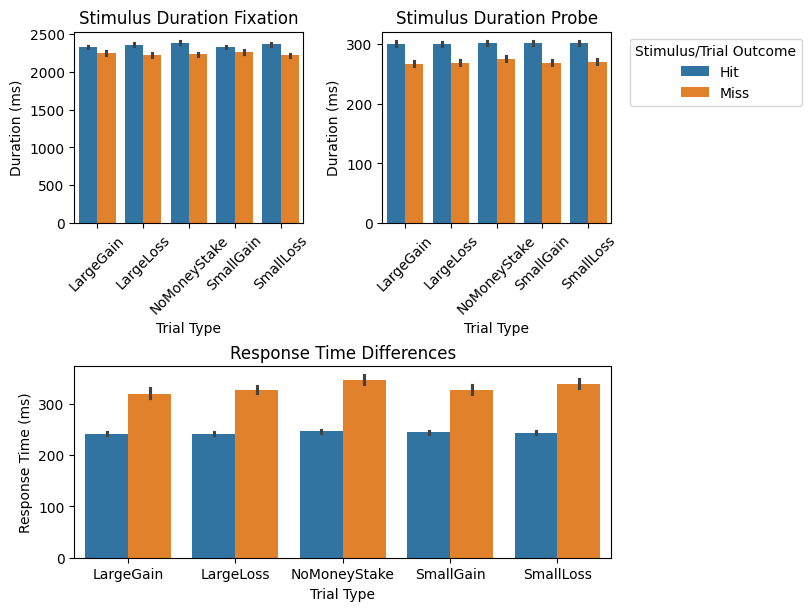

In [236]:
from matplotlib.gridspec import GridSpec

two_pairs = ["#66CCFF", "#3399FF",  "#FFB366", "#FF9933"]
one_pair = ["#99FF99", "#33CC33"]
axs_label_fontsize = 10

concatenated_df_duration_long_no_td1 = concatenated_df_duration_long[concatenated_df_duration_long['Stimulus'] != 'TD1'].copy()
concatenated_df_duration_long_no_td1['duration_ms'] = concatenated_df_duration_long_no_td1['DURATION'] * 1000
concatenated_df_duration_long_no_td1[['Stimulus_new', 'Outcome']] = concatenated_df_duration_long_no_td1['stimulus_outcome'].str.split('/', expand=True)

duration_data_fixation = concatenated_df_duration_long_no_td1[concatenated_df_duration_long_no_td1['Stimulus_new'] == 'Fixation']
duration_data_probe = concatenated_df_duration_long_no_td1[concatenated_df_duration_long_no_td1['Stimulus_new'] == 'Probe']

#fig, axs = plt.subplots(2, 1, figsize=(8,6))
fig = plt.figure(constrained_layout=True, figsize=(8,6))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

sns.barplot(
    x='TRIAL_TYPE',
    y='duration_ms',
    hue='Outcome',
    data=duration_data_fixation,
    hue_order=[
        'Hit',
        'Miss'
    ],    
    ax=ax1,
    legend=False
)
ax1.set_ylabel('Duration (ms)', fontsize=axs_label_fontsize)
ax1.set_xlabel('Trial Type', fontsize=axs_label_fontsize)
ax1.set_title('Stimulus Duration Fixation')
ax1.tick_params(axis='x', labelsize=10, rotation=45)
# ax1.legend(
#     title='Stimulus/Trial Outcome',  loc='upper left'
# )
sns.barplot(
    x='TRIAL_TYPE',
    y='duration_ms',
    hue='Outcome',
    data=duration_data_probe,
    hue_order=[
        'Hit',
        'Miss'
    ],
    ax=ax2,
    legend=True
)
#bbox_to_anchor=(1.05, 1),

ax2.set_ylabel('Duration (ms)', fontsize=axs_label_fontsize)
ax2.set_xlabel('Trial Type', fontsize=axs_label_fontsize)
ax2.set_title('Stimulus Duration Probe')
ax2.tick_params(axis='x', labelsize=10, rotation=45)
ax2.legend(
    title='Stimulus/Trial Outcome', bbox_to_anchor=(1.05, 1),  loc='upper left'
)
sns.barplot(
    x='TRIAL_TYPE',
    y='Response Time',
    hue='stimulus_outcome',
    data=concatenated_df_rts,
    ax=ax3,
    hue_order=['Hit', 'Miss'],
    legend=False
)
# ax3.legend(
#     title='Trial Outcome', loc='upper left'
# )
ax3.set_ylabel('Response Time (ms)', fontsize=axs_label_fontsize)
ax3.set_xlabel('Trial Type', fontsize=axs_label_fontsize)
ax3.set_title('Response Time Differences')
#plt.tight_layout()
plt.savefig('../MID_paper_figures/durations_rts_by_hit_miss_3panel_bar.pdf')

plt.show()

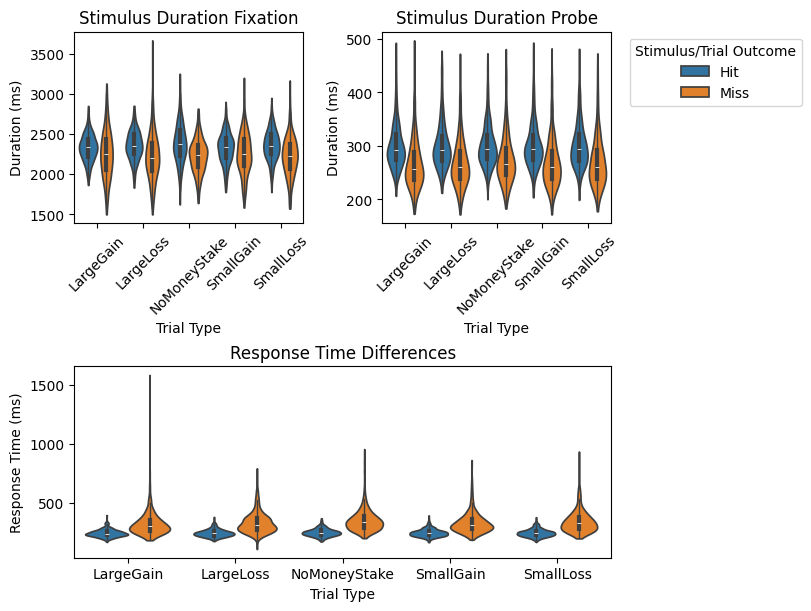

In [237]:
from matplotlib.gridspec import GridSpec

two_pairs = ["#66CCFF", "#3399FF",  "#FFB366", "#FF9933"]
one_pair = ["#99FF99", "#33CC33"]
axs_label_fontsize = 10

concatenated_df_duration_long_no_td1 = concatenated_df_duration_long[concatenated_df_duration_long['Stimulus'] != 'TD1'].copy()
concatenated_df_duration_long_no_td1['duration_ms'] = concatenated_df_duration_long_no_td1['DURATION'] * 1000
concatenated_df_duration_long_no_td1[['Stimulus_new', 'Outcome']] = concatenated_df_duration_long_no_td1['stimulus_outcome'].str.split('/', expand=True)

duration_data_fixation = concatenated_df_duration_long_no_td1[concatenated_df_duration_long_no_td1['Stimulus_new'] == 'Fixation']
duration_data_probe = concatenated_df_duration_long_no_td1[concatenated_df_duration_long_no_td1['Stimulus_new'] == 'Probe']

#fig, axs = plt.subplots(2, 1, figsize=(8,6))
fig = plt.figure(constrained_layout=True, figsize=(8,6))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

sns.violinplot(
    x='TRIAL_TYPE',
    y='duration_ms',
    hue='Outcome',
    data=duration_data_fixation,
    hue_order=[
        'Hit',
        'Miss'
    ],
    cut=0,
    inner_kws=dict(box_width=3),
    ax=ax1,
    legend=False
)
ax1.set_ylabel('Duration (ms)', fontsize=axs_label_fontsize)
ax1.set_xlabel('Trial Type', fontsize=axs_label_fontsize)
ax1.set_title('Stimulus Duration Fixation')
ax1.tick_params(axis='x', labelsize=10, rotation=45)
# ax1.legend(
#     title='Stimulus/Trial Outcome',  loc='upper left'
# )
sns.violinplot(
    x='TRIAL_TYPE',
    y='duration_ms',
    hue='Outcome',
    data=duration_data_probe,
    hue_order=[
        'Hit',
        'Miss'
    ],
    cut=0,
    inner_kws=dict(box_width=3),
    ax=ax2,
    legend=True
)
#bbox_to_anchor=(1.05, 1),

ax2.set_ylabel('Duration (ms)', fontsize=axs_label_fontsize)
ax2.set_xlabel('Trial Type', fontsize=axs_label_fontsize)
ax2.set_title('Stimulus Duration Probe')
ax2.tick_params(axis='x', labelsize=10, rotation=45)
ax2.legend(
    title='Stimulus/Trial Outcome', bbox_to_anchor=(1.05, 1),  loc='upper left'
)
sns.violinplot(
    x='TRIAL_TYPE',
    y='Response Time',
    hue='stimulus_outcome',
    data=concatenated_df_rts,
    ax=ax3,
    hue_order=['Hit', 'Miss'],
    cut=0,
    inner_kws=dict(box_width=3),
    legend=False
)
# ax3.legend(
#     title='Trial Outcome', loc='upper left'
# )
ax3.set_ylabel('Response Time (ms)', fontsize=axs_label_fontsize)
ax3.set_xlabel('Trial Type', fontsize=axs_label_fontsize)
ax3.set_title('Response Time Differences')
#plt.tight_layout()
plt.savefig('../MID_paper_figures/durations_rts_by_hit_miss_violin.pdf')

plt.show()

In [27]:
events.columns

Index(['index', 'trial_number', 'TRIAL_TYPE', 'CUE_ONSET', 'CUE_DURATION',
       'FIXATION_ONSET', 'FIXATION_DURATION', 'PROBE_ONSET', 'PROBE_DURATION',
       'FEEDBACK_ONSET', 'FEEDBACK_DURATION', 'RT_corrected', 'PROBE_HIT',
       'Response'],
      dtype='object')

# Look at RTs by Response Type and summarize how trials are split by response type

In [210]:
def get_response_proportions(sub):
    events = get_events_df_for_subject(sub, dataset='ABCD')
    response_counts = events['Response'].value_counts(normalize=True) * 100
    response_counts = response_counts.reset_index()
    response_dict = {row['Response']: [row['proportion']] for _, row in response_counts.iterrows()}
    return response_dict

In [211]:
for sub in range(1, 501):
    response_dict = get_response_proportions(sub)
    if sub == 1:
        all_sub_response_proportions = response_dict
    else:
        for key in response_dict:
            all_sub_response_proportions[key].extend(response_dict[key])



In [212]:
for key, val in all_sub_response_proportions.items():
    print(key)
    mean_val = np.mean(np.array(val))
    print(f'# of subjects = {len(val)}')
    print(f'Averaged proportion = {mean_val}\n')


Correct Response!
# of subjects = 500
Averaged proportion = 56.786

You pressed too slow!
# of subjects = 500
Averaged proportion = 36.236

You pressed too soon!
# of subjects = 495
Averaged proportion = 7.048484848484849



In [29]:
def get_all_durations_response_type(sub):
    events = get_events_df_for_subject(sub, dataset='ABCD')
    events['TD1_ONSET'] = events['PROBE_ONSET'] + events['PROBE_DURATION']
    events['TD1_DURATION'] = events['FEEDBACK_ONSET'] - events['TD1_ONSET']
    events = events.rename(
        columns={
            'FIXATION_DURATION': 'Fixation_DURATION',
            'PROBE_DURATION': 'Probe_DURATION',
        }
    )
    average_dur = events.groupby(['TRIAL_TYPE', 'Response'])[
        ['Fixation_DURATION', 'Probe_DURATION', 'TD1_DURATION']
    ].mean()
    average_dur = average_dur.reset_index()
    return average_dur

all_dfs_duration_response_type = []
for sub in range(1, 501):
    df = get_all_durations_response_type(sub)
    all_dfs_duration_response_type.append(df)
concatenated_df_duration_response_type = pd.concat(all_dfs_duration_response_type, ignore_index=True)

In [31]:
concatenated_df_duration_response_type_long = pd.melt(
    concatenated_df_duration_response_type,
    id_vars=['TRIAL_TYPE', 'Response'],
    value_vars=[
        col for col in concatenated_df_duration_response_type.columns if 'DURATION' in col
    ],
    var_name='Stimulus',
    value_name='DURATION',
)
concatenated_df_duration_response_type_long['Stimulus'] = concatenated_df_duration_response_type_long[
    'Stimulus'
].str.replace('_DURATION', '')
concatenated_df_duration_response_type_long['stimulus_outcome'] = concatenated_df_duration_response_type_long.apply(
    lambda row: f"{row['Stimulus']}/{row['Response']}", axis=1
)



(6811, 5)
      TRIAL_TYPE               Response  Stimulus  DURATION  \
0      LargeGain      Correct Response!  Fixation  2.166583   
1      LargeGain  You pressed too slow!  Fixation  2.333000   
2      LargeGain  You pressed too soon!  Fixation  3.000000   
3      LargeLoss      Correct Response!  Fixation  2.099867   
4      LargeLoss  You pressed too slow!  Fixation  2.999750   
...          ...                    ...       ...       ...   
20428  SmallGain  You pressed too slow!       TD1  0.064500   
20429  SmallGain  You pressed too soon!       TD1  0.060667   
20430  SmallLoss      Correct Response!       TD1  0.066857   
20431  SmallLoss  You pressed too slow!       TD1  0.066800   
20432  SmallLoss  You pressed too soon!       TD1  0.067000   

                     stimulus_outcome  
0          Fixation/Correct Response!  
1      Fixation/You pressed too slow!  
2      Fixation/You pressed too soon!  
3          Fixation/Correct Response!  
4      Fixation/You pressed too s

In [32]:
def get_all_rts_response_type(sub):
    events = get_events_df_for_subject(sub, dataset='ABCD')
    events = events.rename(columns={'RT_corrected': 'Response Time'})
    average_rt = events.groupby(['TRIAL_TYPE', 'Response'])[
        ['Response Time']
    ].mean()
    average_rt = average_rt.reset_index()
    return average_rt

all_dfs_rts_response_type = []
for sub in range(1, 501):
    df = get_all_rts_response_type(sub)
    all_dfs_rts_response_type.append(df)
concatenated_df_rts_response_type = pd.concat(all_dfs_rts_response_type, ignore_index=True)

In [132]:
concatenated_df_duration_response_type_long_no_td1.columns

Index(['TRIAL_TYPE', 'Response', 'Stimulus', 'DURATION', 'stimulus_outcome'], dtype='object')

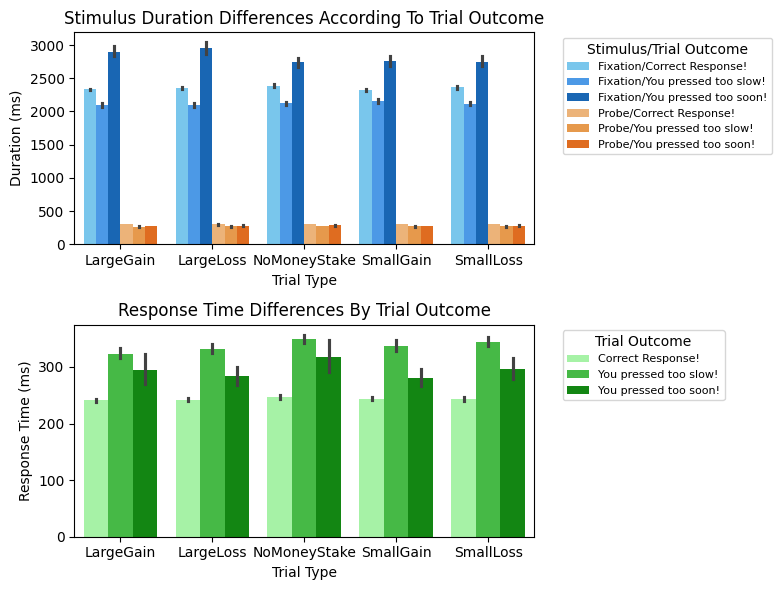

In [213]:
concatenated_df_duration_response_type_long_no_td1 = concatenated_df_duration_response_type_long[concatenated_df_duration_response_type_long['Stimulus'] != 'TD1'].copy()

concatenated_df_duration_response_type_long_no_td1['duration_ms'] = concatenated_df_duration_response_type_long_no_td1['DURATION'].values * 1000


# colors
two_triples = ["#66CCFF", "#3399FF", "#0066CC", "#FFB366", "#FF9933", "#FF6600"]
one_triple = ["#99FF99", "#33CC33", "#009900"]


fig_path = '../MID_paper_figures/durations_rts_by_trial_type.pdf'
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

bar_palette = sns.color_palette('Paired')

sns.barplot(
    x='TRIAL_TYPE',
    y='duration_ms',
    hue='stimulus_outcome',
    data=concatenated_df_duration_response_type_long_no_td1,
    palette=two_triples,
    hue_order=[
        'Fixation/Correct Response!',
        'Fixation/You pressed too slow!',
        'Fixation/You pressed too soon!',
        'Probe/Correct Response!',
        'Probe/You pressed too slow!',
        'Probe/You pressed too soon!',
    ],
    ax=axs[0],
)

axs[0].legend(
    title='Stimulus/Trial Outcome', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8
)
axs[0].set_ylabel('Duration (ms)')
axs[0].set_xlabel('Trial Type')
axs[0].set_title('Stimulus Duration Differences According To Trial Outcome')

sns.barplot(
    x='TRIAL_TYPE',
    y='Response Time',
    hue='Response',
    data=concatenated_df_rts_response_type,
    palette=one_triple,
    ax=axs[1],
    hue_order=['Correct Response!', 'You pressed too slow!', 'You pressed too soon!'],
)
axs[1].legend(
    title='Trial Outcome', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8
)
axs[1].set_ylabel('Response Time (ms)')
axs[1].set_xlabel('Trial Type')
axs[1].set_title('Response Time Differences By Trial Outcome')

plt.tight_layout()
plt.savefig(fig_path, bbox_inches='tight')
plt.show()


In [214]:
concatenated_df_duration_response_type_long_no_td1

,TRIAL_TYPE,Response,Stimulus,DURATION,stimulus_outcome,duration_ms
0,LargeGain,Correct Response!,Fixation,2.166583,Fixation/Correct Response!,2166.583333
1,LargeGain,You pressed too slow!,Fixation,2.333000,Fixation/You pressed too slow!,2333.000000
2,LargeGain,You pressed too soon!,Fixation,3.000000,Fixation/You pressed too soon!,3000.000000
3,LargeLoss,Correct Response!,Fixation,2.099867,Fixation/Correct Response!,2099.866667
4,LargeLoss,You pressed too slow!,Fixation,2.999750,Fixation/You pressed too slow!,2999.750000
...,...,...,...,...,...,...
13617,SmallGain,You pressed too slow!,Probe,0.220875,Probe/You pressed too slow!,220.875000
13618,SmallGain,You pressed too soon!,Probe,0.217000,Probe/You pressed too soon!,217.000000
13619,SmallLoss,Correct Response!,Probe,0.258000,Probe/Correct Response!,258.000000
13620,SmallLoss,You pressed too slow!,Probe,0.203200,Probe/You pressed too slow!,203.200000


In [220]:
concatenated_df_rts_response_type

,TRIAL_TYPE,Response,Response Time,hit_miss
0,LargeGain,Correct Response!,213.333333,Hit
1,LargeGain,You pressed too slow!,241.500000,Miss
2,LargeGain,You pressed too soon!,NaN,Miss
3,LargeLoss,Correct Response!,216.600000,Hit
4,LargeLoss,You pressed too slow!,230.500000,Miss
...,...,...,...,...
6806,SmallGain,You pressed too slow!,281.000000,Miss
6807,SmallGain,You pressed too soon!,NaN,Miss
6808,SmallLoss,Correct Response!,211.857143,Hit
6809,SmallLoss,You pressed too slow!,227.500000,Miss


/var/folders/y4/qn1yzt191kb4h4vwfbmgvt340000gn/T/ipykernel_48697/2216329057.py:71: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


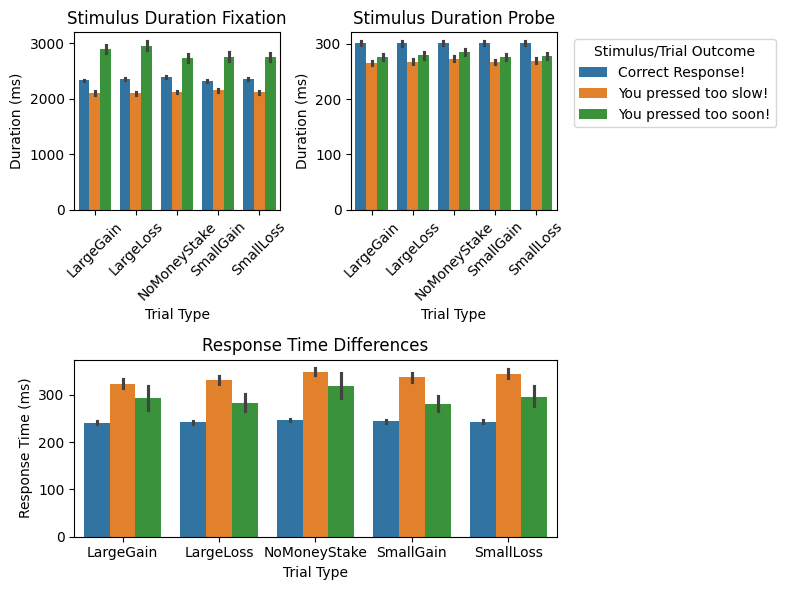

In [234]:

duration_data_fixation = concatenated_df_duration_response_type_long_no_td1[concatenated_df_duration_response_type_long_no_td1['Stimulus'] == 'Fixation']
duration_data_probe = concatenated_df_duration_response_type_long_no_td1[concatenated_df_duration_response_type_long_no_td1['Stimulus'] == 'Probe']

fig = plt.figure(constrained_layout=True, figsize=(8,6))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

sns.barplot(
    x='TRIAL_TYPE',
    y='duration_ms',
    hue='Response',
    data=duration_data_fixation,
    hue_order=[
        'Correct Response!',
        'You pressed too slow!',
        'You pressed too soon!'
    ],
    ax=ax1,
    legend=False,
)
ax1.set_ylabel('Duration (ms)', fontsize=axs_label_fontsize)
ax1.set_xlabel('Trial Type', fontsize=axs_label_fontsize)
ax1.set_title('Stimulus Duration Fixation')
ax1.tick_params(axis='x', labelsize=10, rotation=45)
# ax1.legend(
#     title='Stimulus/Trial Outcome',  loc='upper left'
# )
sns.barplot(
    x='TRIAL_TYPE',
    y='duration_ms',
    hue='Response',
    data=duration_data_probe,
    hue_order=[
        'Correct Response!',
        'You pressed too slow!',
        'You pressed too soon!'
    ],
    ax=ax2,
    legend=True
)
#bbox_to_anchor=(1.05, 1),

ax2.set_ylabel('Duration (ms)', fontsize=axs_label_fontsize)
ax2.set_xlabel('Trial Type', fontsize=axs_label_fontsize)
ax2.set_title('Stimulus Duration Probe')
ax2.tick_params(axis='x', labelsize=10, rotation=45)
ax2.legend(
    title='Stimulus/Trial Outcome', bbox_to_anchor=(1.05, 1),  loc='upper left'
)
sns.barplot(
    x='TRIAL_TYPE',
    y='Response Time',
    hue='Response',
    data=concatenated_df_rts_response_type,
    ax=ax3,
    hue_order=[
        'Correct Response!',
        'You pressed too slow!',
        'You pressed too soon!'
    ],
    legend=False
)
# ax3.legend(
#     title='Trial Outcome', loc='upper left'
# )
ax3.set_ylabel('Response Time (ms)', fontsize=axs_label_fontsize)
ax3.set_xlabel('Trial Type', fontsize=axs_label_fontsize)
ax3.set_title('Response Time Differences')
plt.tight_layout()
plt.savefig('../MID_paper_figures/durations_rts_by_trial_outcome_3_panel_barplot.pdf')

plt.show()

/var/folders/y4/qn1yzt191kb4h4vwfbmgvt340000gn/T/ipykernel_48697/2913644864.py:77: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


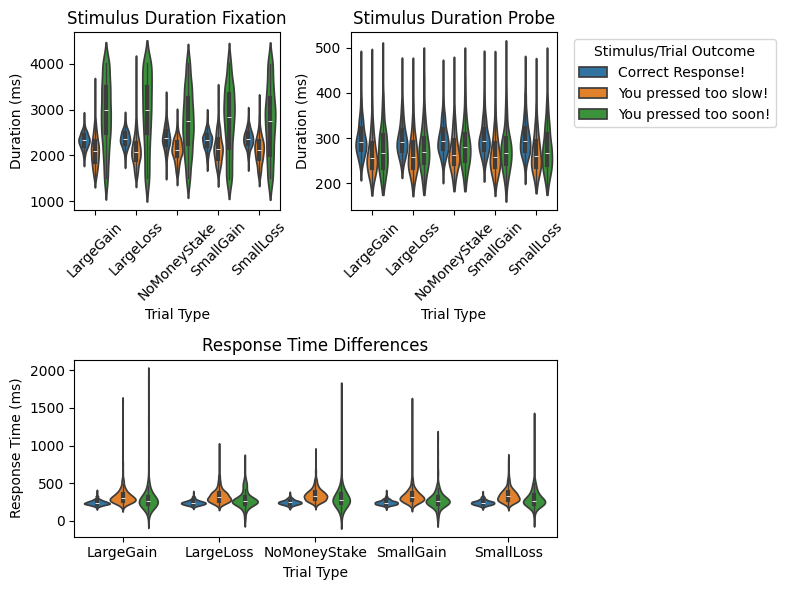

In [230]:
# violin plots

duration_data_fixation = concatenated_df_duration_response_type_long_no_td1[concatenated_df_duration_response_type_long_no_td1['Stimulus'] == 'Fixation']
duration_data_probe = concatenated_df_duration_response_type_long_no_td1[concatenated_df_duration_response_type_long_no_td1['Stimulus'] == 'Probe']

fig = plt.figure(constrained_layout=True, figsize=(8,6))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

sns.violinplot(
    x='TRIAL_TYPE',
    y='duration_ms',
    hue='Response',
    data=duration_data_fixation,
    hue_order=[
        'Correct Response!',
        'You pressed too slow!',
        'You pressed too soon!'
    ],
    inner_kws=dict(box_width=3),
    ax=ax1,
    legend=False,
)
ax1.set_ylabel('Duration (ms)', fontsize=axs_label_fontsize)
ax1.set_xlabel('Trial Type', fontsize=axs_label_fontsize)
ax1.set_title('Stimulus Duration Fixation')
ax1.tick_params(axis='x', labelsize=10, rotation=45)
# ax1.legend(
#     title='Stimulus/Trial Outcome',  loc='upper left'
# )
sns.violinplot(
    x='TRIAL_TYPE',
    y='duration_ms',
    hue='Response',
    data=duration_data_probe,
    hue_order=[
        'Correct Response!',
        'You pressed too slow!',
        'You pressed too soon!'
    ],
    cut=0,
    inner_kws=dict(box_width=3),
    ax=ax2,
    legend=True
)
#bbox_to_anchor=(1.05, 1),

ax2.set_ylabel('Duration (ms)', fontsize=axs_label_fontsize)
ax2.set_xlabel('Trial Type', fontsize=axs_label_fontsize)
ax2.set_title('Stimulus Duration Probe')
ax2.tick_params(axis='x', labelsize=10, rotation=45)
ax2.legend(
    title='Stimulus/Trial Outcome', bbox_to_anchor=(1.05, 1),  loc='upper left'
)
sns.violinplot(
    x='TRIAL_TYPE',
    y='Response Time',
    hue='Response',
    data=concatenated_df_rts_response_type,
    ax=ax3,
    hue_order=[
        'Correct Response!',
        'You pressed too slow!',
        'You pressed too soon!'
    ],
    inner_kws=dict(box_width=3),
    legend=False
)
# ax3.legend(
#     title='Trial Outcome', loc='upper left'
# )
ax3.set_ylabel('Response Time (ms)', fontsize=axs_label_fontsize)
ax3.set_xlabel('Trial Type', fontsize=axs_label_fontsize)
ax3.set_title('Response Time Differences')
plt.tight_layout()
plt.savefig('../MID_paper_figures/durations_rts_by_trial_outcome_violin.pdf')

plt.show()

In [119]:
average_duration_per_stimulus_outcome = concatenated_df_duration_response_type_long_no_td1.groupby('stimulus_outcome')['DURATION'].mean().reset_index()
print(average_duration_per_stimulus_outcome)

                 stimulus_outcome  DURATION
0      Fixation/Correct Response!  2.352119
1  Fixation/You pressed too slow!  2.119275
2  Fixation/You pressed too soon!  2.816988
3         Probe/Correct Response!  0.301271
4     Probe/You pressed too slow!  0.268304
5     Probe/You pressed too soon!  0.278877


In [127]:
print('Fixation/You pressed too soon - Fixation/You pressed too slow')
print(average_duration_per_stimulus_outcome.loc[average_duration_per_stimulus_outcome['stimulus_outcome'].str.contains('Fixation/You pressed too soon'), 'DURATION'].values-
 average_duration_per_stimulus_outcome.loc[average_duration_per_stimulus_outcome['stimulus_outcome'].str.contains('Fixation/You pressed too slow'), 'DURATION'].values)

print('Probe/You pressed too soon - Probe/You pressed too slow')
print(average_duration_per_stimulus_outcome.loc[average_duration_per_stimulus_outcome['stimulus_outcome'].str.contains('Probe/You pressed too soon'), 'DURATION'].values-
 average_duration_per_stimulus_outcome.loc[average_duration_per_stimulus_outcome['stimulus_outcome'].str.contains('Probe/You pressed too slow'), 'DURATION'].values)

Fixation/You pressed too soon - Fixation/You pressed too slow
[0.69771288]
Probe/You pressed too soon - Probe/You pressed too slow
[0.01057288]


In [130]:
concatenated_df_rts_response_type

,TRIAL_TYPE,Response,Response Time,hit_miss
0,LargeGain,Correct Response!,213.333333,Hit
1,LargeGain,You pressed too slow!,241.500000,Miss
2,LargeGain,You pressed too soon!,NaN,Miss
3,LargeLoss,Correct Response!,216.600000,Hit
4,LargeLoss,You pressed too slow!,230.500000,Miss
...,...,...,...,...
6806,SmallGain,You pressed too slow!,281.000000,Miss
6807,SmallGain,You pressed too soon!,NaN,Miss
6808,SmallLoss,Correct Response!,211.857143,Hit
6809,SmallLoss,You pressed too slow!,227.500000,Miss


In [131]:
average_rt_per_stimulus_outcome = concatenated_df_rts_response_type.groupby('Response')['Response Time'].mean().reset_index()

print('Probe/You pressed too slow - Probe/You pressed too soon')
print(average_rt_per_stimulus_outcome.loc[average_rt_per_stimulus_outcome['Response'].str.contains('You pressed too slow'), 'Response Time'].values-
 average_rt_per_stimulus_outcome.loc[average_rt_per_stimulus_outcome['Response'].str.contains('You pressed too soon'), 'Response Time'].values)

Probe/You pressed too slow - Probe/You pressed too soon
[42.81537482]
